In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing the DataSet

In [3]:
DF = pd.read_csv("cancer_reg.csv", encoding='latin')
DF.drop(columns="binnedInc", inplace=True)
# DF.replace([np.inf, -np.inf], np.nan)

# Exploring the data

In [4]:
DF.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  Geography                3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

We notice that there are some rows that having null values

# Choosing the predictor

In [6]:
DF.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# Part1 : Data Analysis 

* Explore the columns that have null values 
* fill the null values with zeros
* plot the average target death rate per year for each city for the 16 years

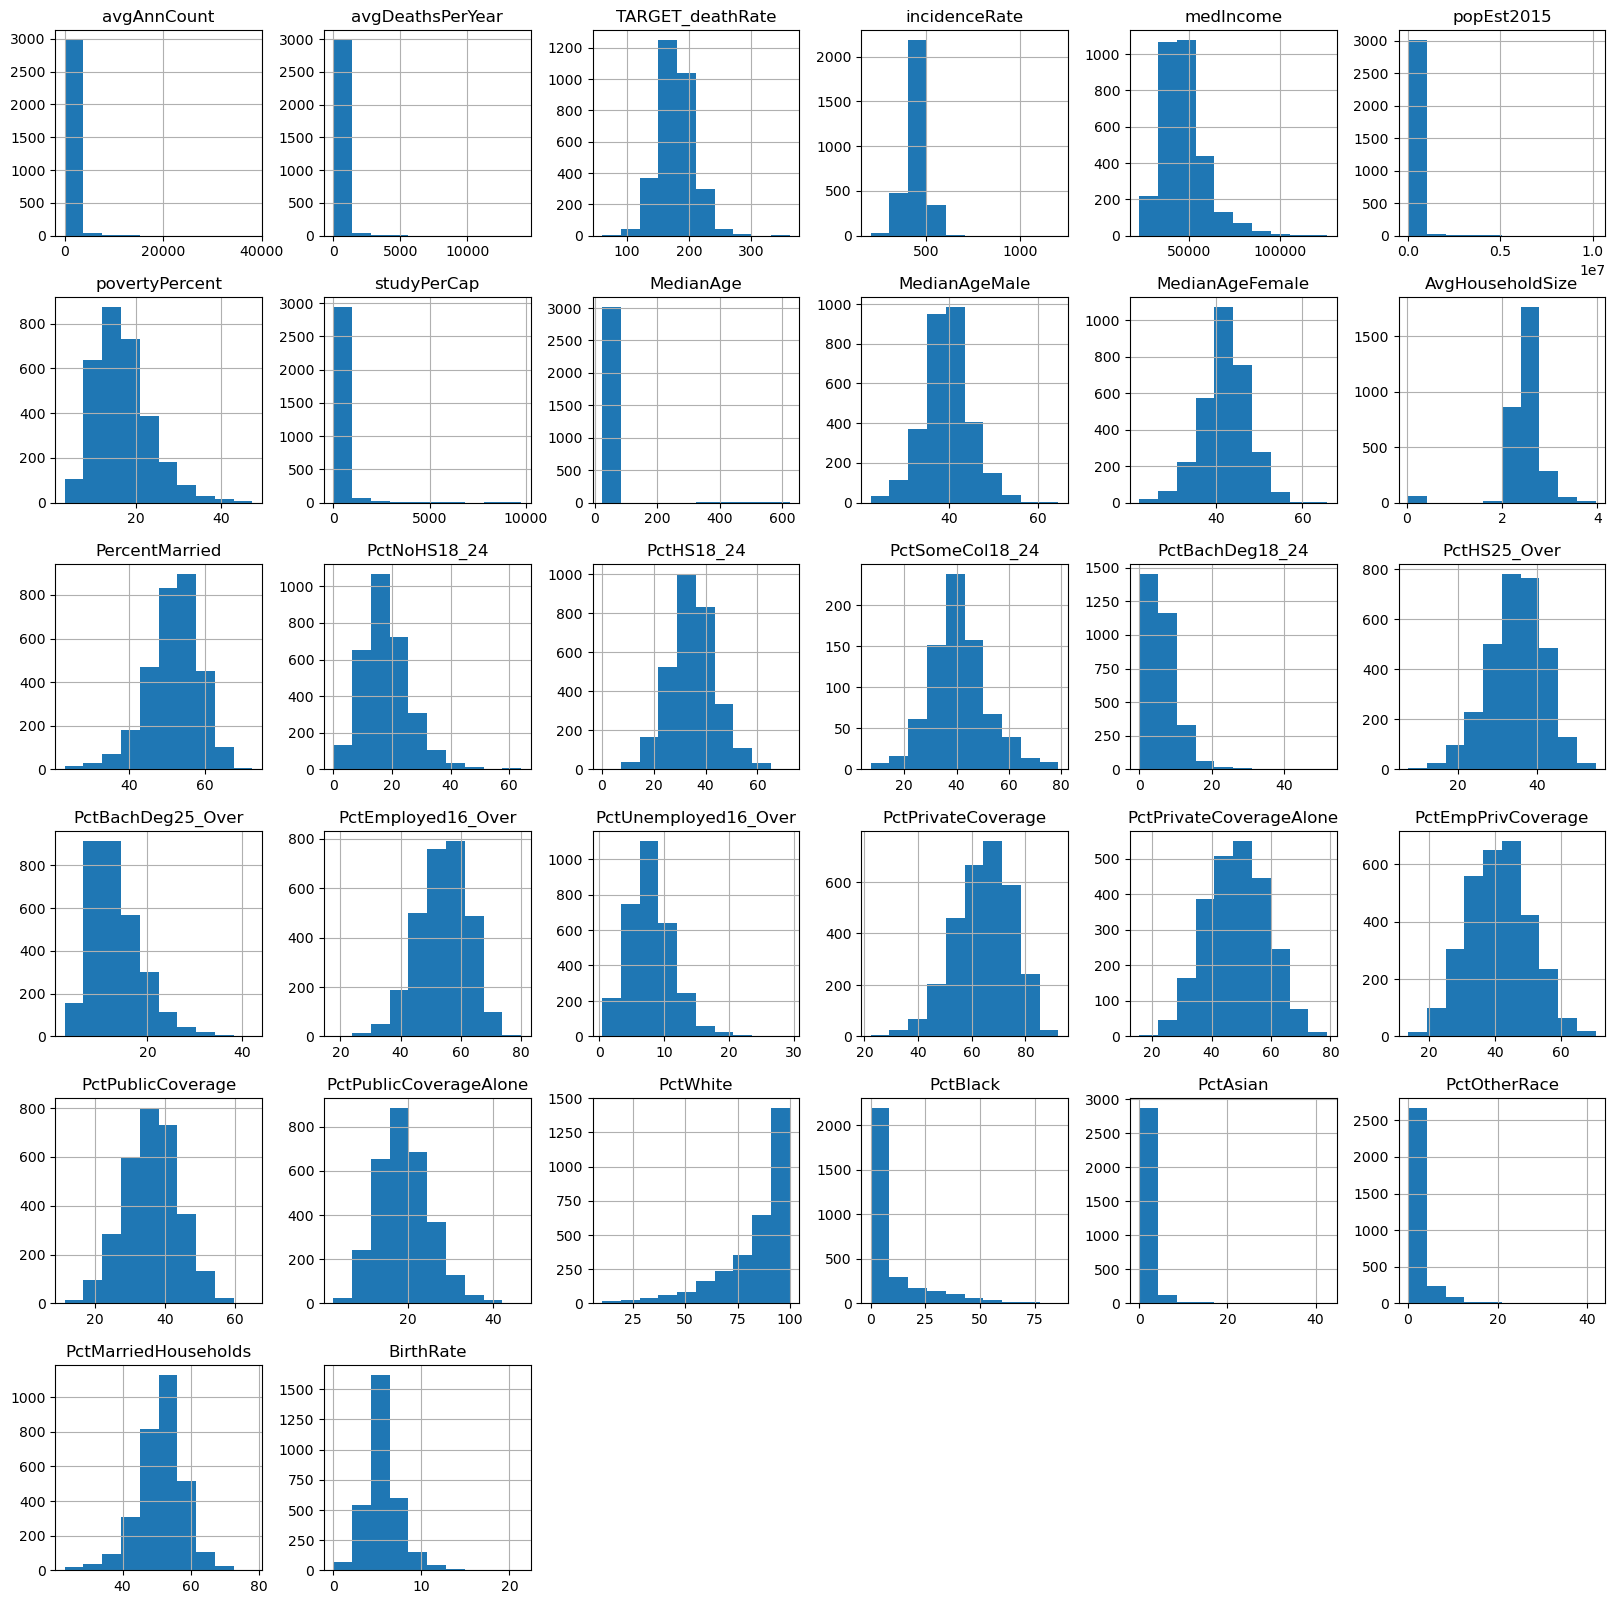

In [7]:
DF.hist(figsize=(20,20))
plt.show()

In [8]:
DF.isna().any()

avgAnnCount                False
avgDeathsPerYear           False
TARGET_deathRate           False
incidenceRate              False
medIncome                  False
popEst2015                 False
povertyPercent             False
studyPerCap                False
MedianAge                  False
MedianAgeMale              False
MedianAgeFemale            False
Geography                  False
AvgHouseholdSize           False
PercentMarried             False
PctNoHS18_24               False
PctHS18_24                 False
PctSomeCol18_24             True
PctBachDeg18_24            False
PctHS25_Over               False
PctBachDeg25_Over          False
PctEmployed16_Over          True
PctUnemployed16_Over       False
PctPrivateCoverage         False
PctPrivateCoverageAlone     True
PctEmpPrivCoverage         False
PctPublicCoverage          False
PctPublicCoverageAlone     False
PctWhite                   False
PctBlack                   False
PctAsian                   False
PctOtherRa

we notice that the columns "PctSomeCol18_24" , "PctEmployed16_Over", and "PctPrivateCoverageAlone" have null values

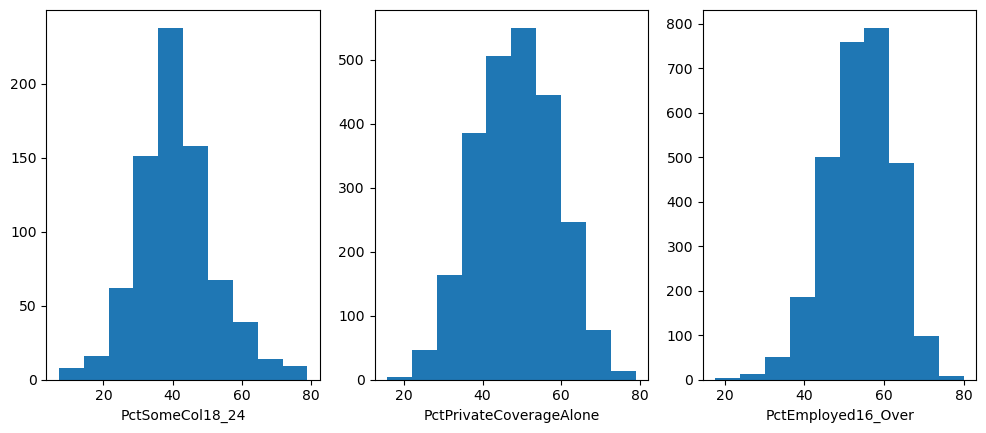

In [9]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
ax[0].hist(DF['PctSomeCol18_24'])
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'])
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'])
ax[2].set_xlabel('PctEmployed16_Over')
plt.show()

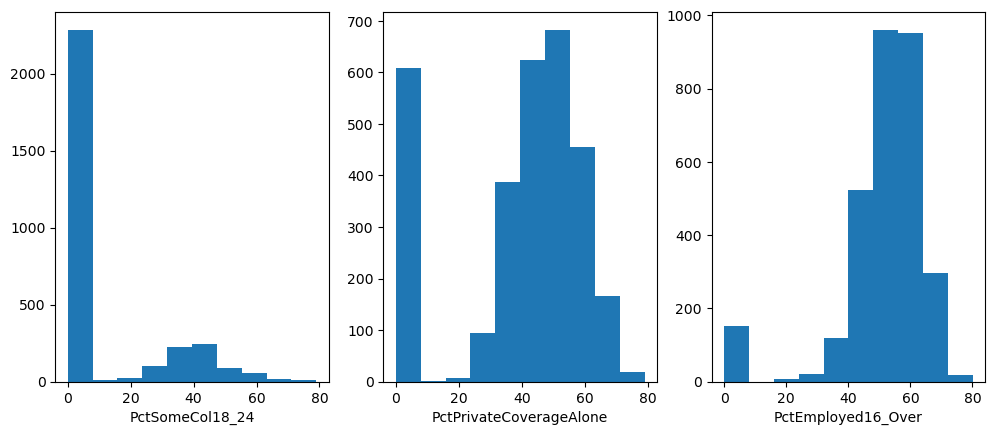

In [10]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
ax[0].set_label("fill non values with 0s")
ax[0].hist(DF['PctSomeCol18_24'].fillna(0))
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'].fillna(0))
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'].fillna(0))
ax[2].set_xlabel('PctEmployed16_Over')
fig.set_label('fill non values with 0s')
plt.show()

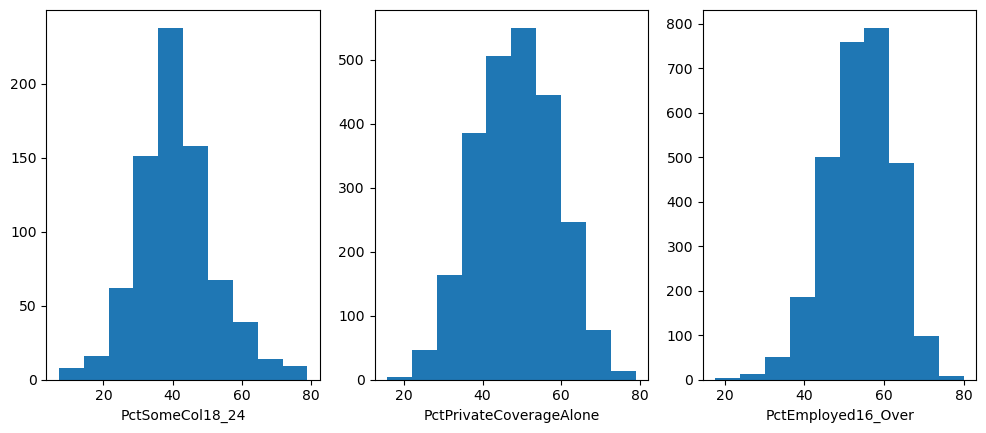

In [11]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
ax[0].set_label("fill non values with 0s")
ax[0].hist(DF['PctSomeCol18_24'].dropna())
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'].dropna())
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'].dropna())
ax[2].set_xlabel('PctEmployed16_Over')
fig.set_label('fill non values with 0s')
plt.show()

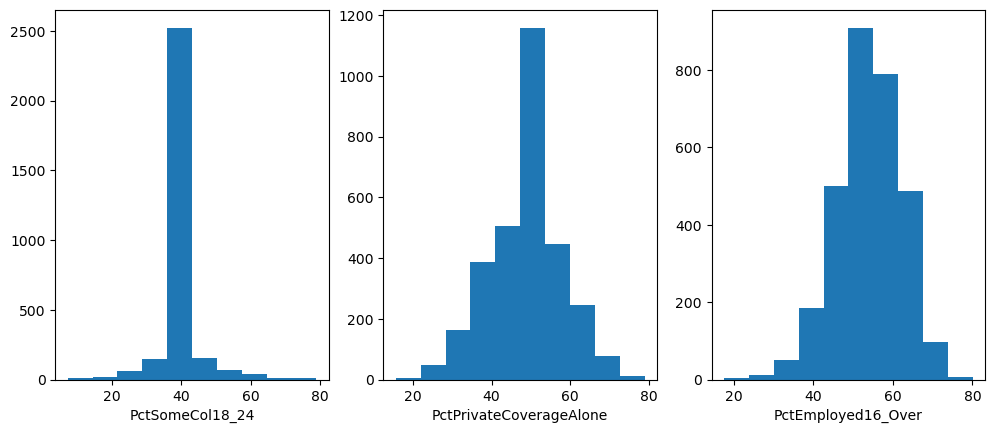

In [12]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
ax[0].set_label("fill non values with 0s")
ax[0].hist(DF['PctSomeCol18_24'].fillna(DF['PctSomeCol18_24'].mean()))
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'].fillna(DF['PctPrivateCoverageAlone'].mean()))
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'].fillna(DF['PctEmployed16_Over'].mean()))
ax[2].set_xlabel('PctEmployed16_Over')
plt.show()

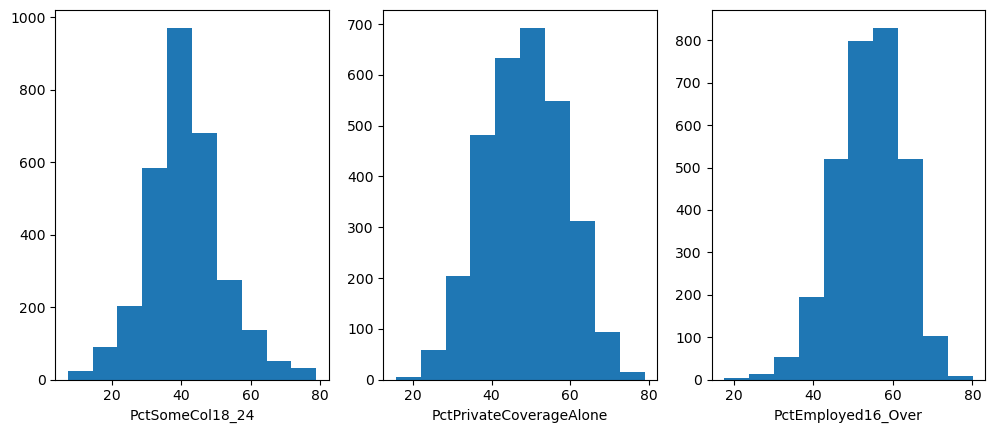

In [13]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)
ax[0].set_label("fill non values with 0s")
ax[0].hist(DF['PctSomeCol18_24'].fillna(DF['PctSomeCol18_24'].ffill()))
ax[0].set_xlabel('PctSomeCol18_24')
ax[1].hist(DF['PctPrivateCoverageAlone'].fillna(DF['PctPrivateCoverageAlone'].ffill()))
ax[1].set_xlabel('PctPrivateCoverageAlone')
ax[2].hist(DF['PctEmployed16_Over'].fillna(DF['PctEmployed16_Over'].ffill()))
ax[2].set_xlabel('PctEmployed16_Over')
plt.show()

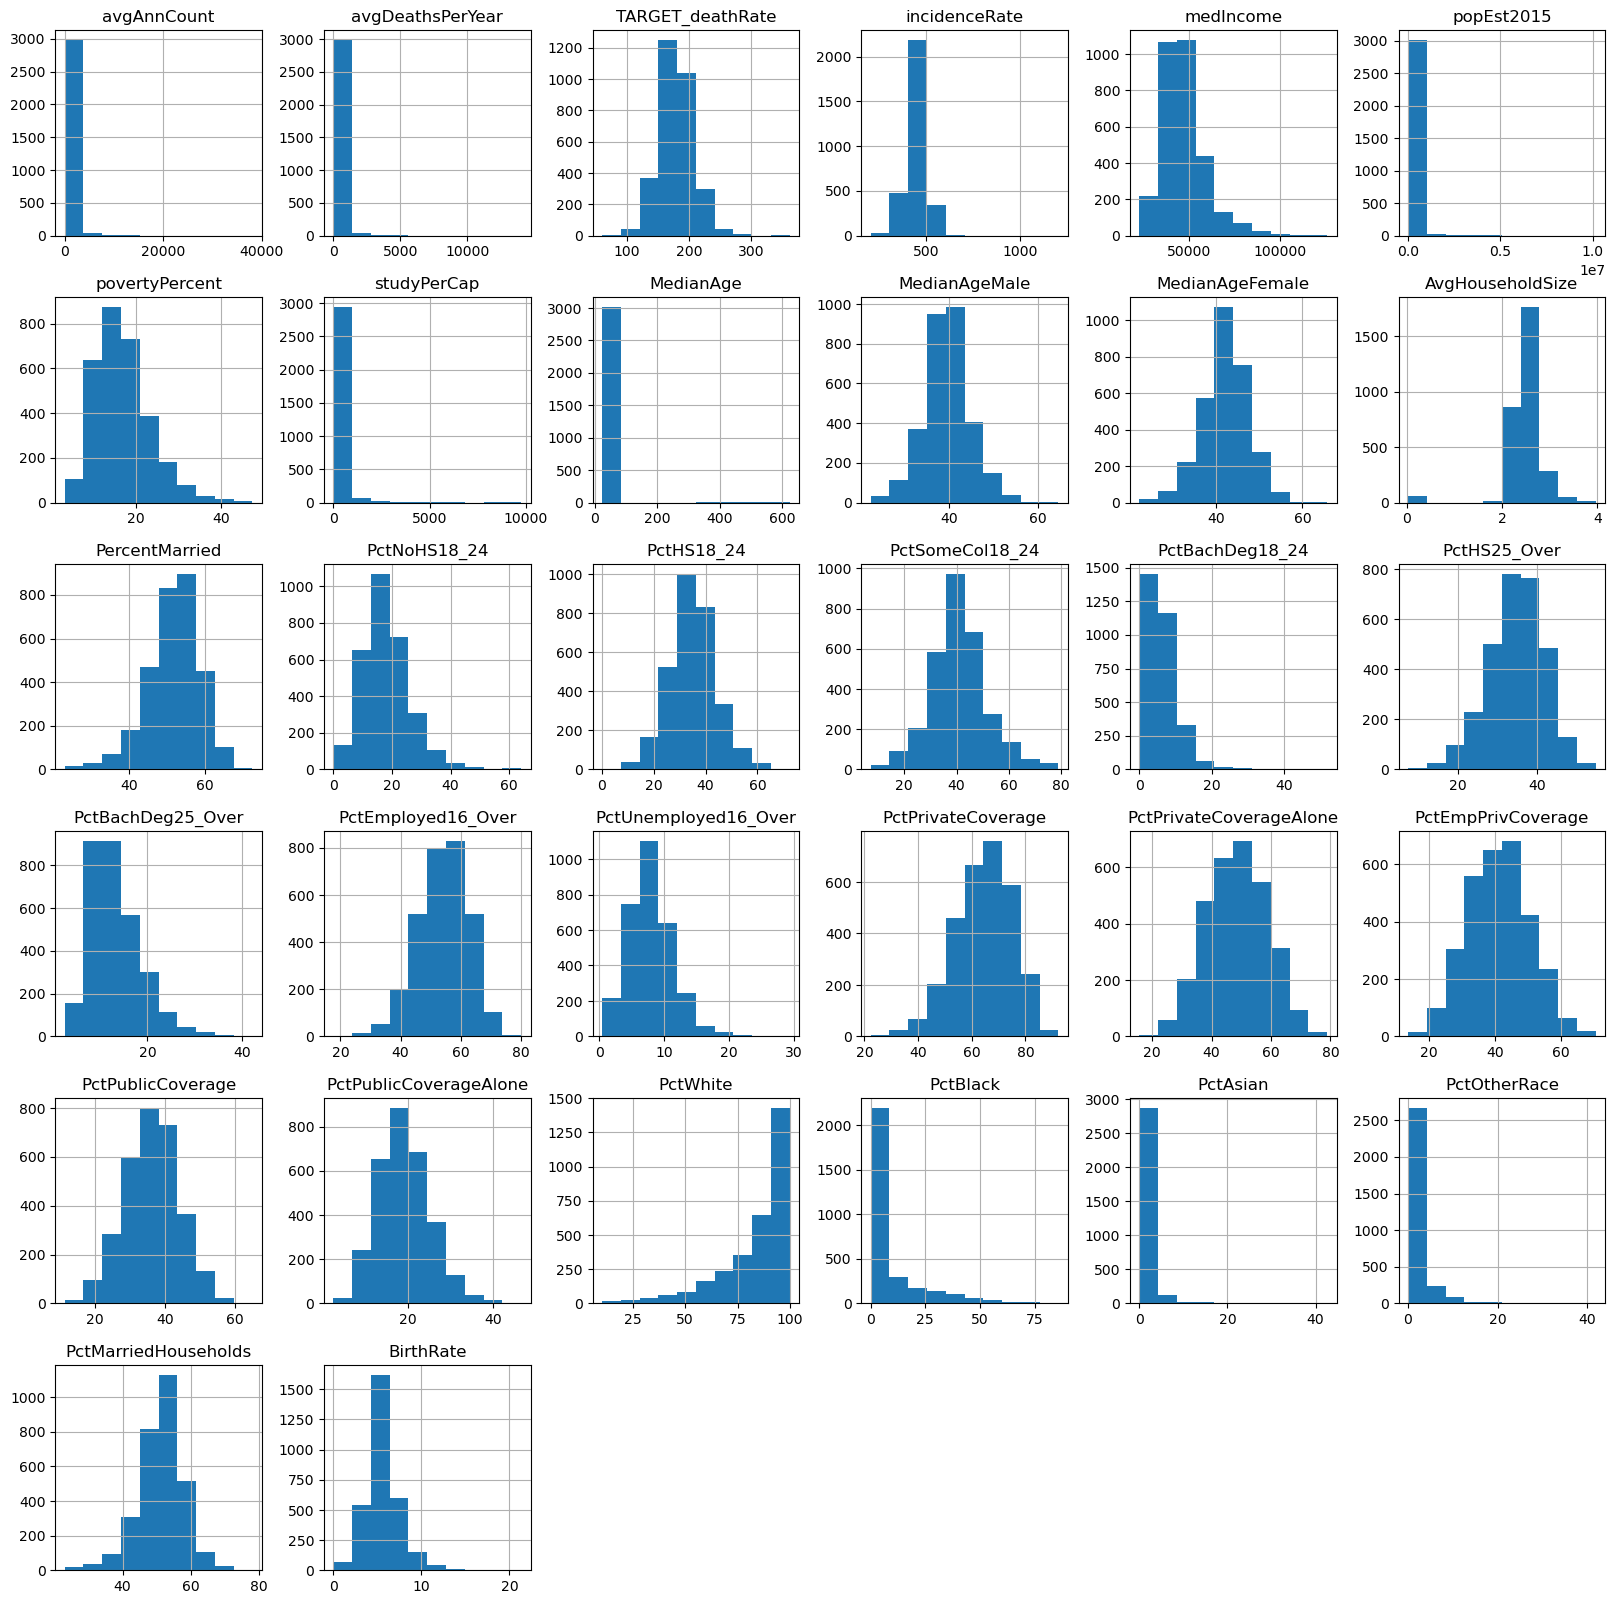

In [14]:
DF["PctSomeCol18_24"] = DF["PctSomeCol18_24"].ffill()
DF["PctEmployed16_Over"] = DF["PctEmployed16_Over"].ffill()
DF['PctPrivateCoverageAlone'] = DF['PctPrivateCoverageAlone'].ffill()
DF.hist(figsize=(20,20))
plt.show()

In [15]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  Geography                3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

### Adding a city & district columns to draw a plot for the average target death rate per year for each city

In [16]:
DF['City'] = DF['Geography'].str.split(',').str[1]
DF['District'] = DF['Geography'].str.split(',').str[0]

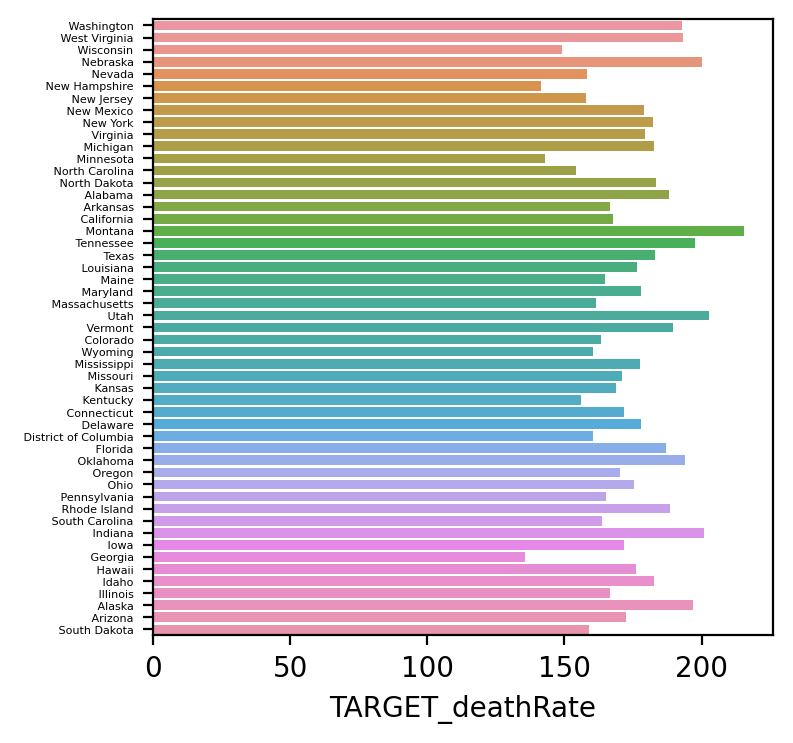

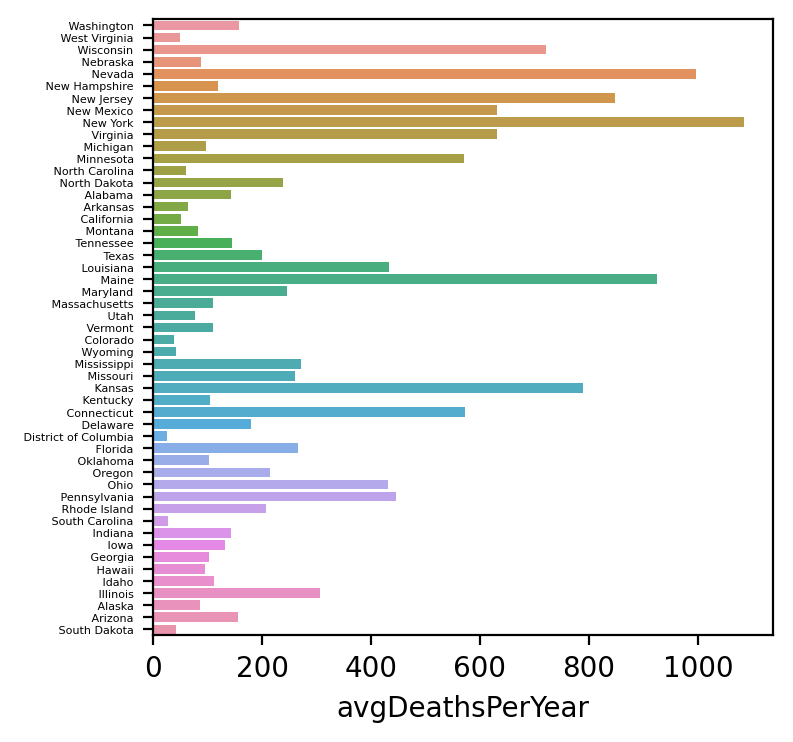

In [17]:
fig1 = plt.figure(figsize=(4, 4), dpi=200)
ax1 = sns.barplot(y=DF.sort_values(by='City')['City'].unique()[:], x=DF.groupby('City')['TARGET_deathRate'].mean()[:])
ax1.set_yticklabels(DF['City'].unique(), fontsize=4)
fig2 = plt.figure(figsize=(4, 4), dpi=200)
ax2 = sns.barplot(y=DF.sort_values(by='City')['City'].unique()[:], x=DF.groupby('City')['avgDeathsPerYear'].mean()[:])
ax2.set_yticklabels(DF['City'].unique(), fontsize=4)
plt.show()

# Data visualization

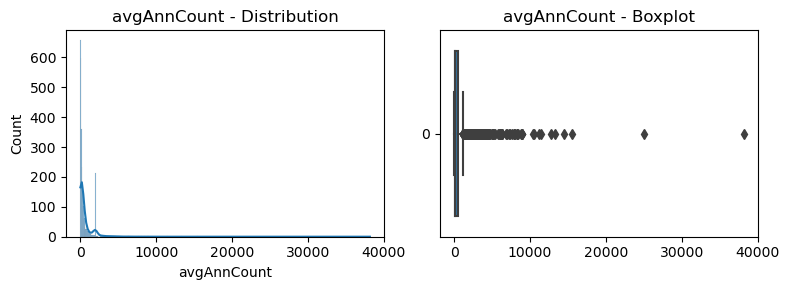

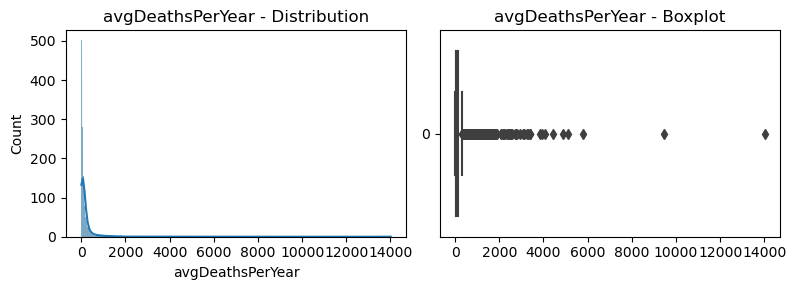

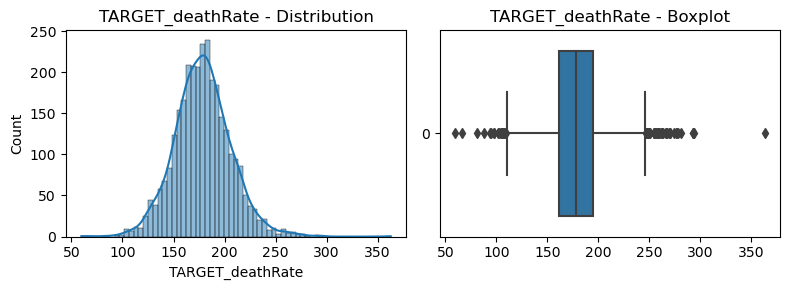

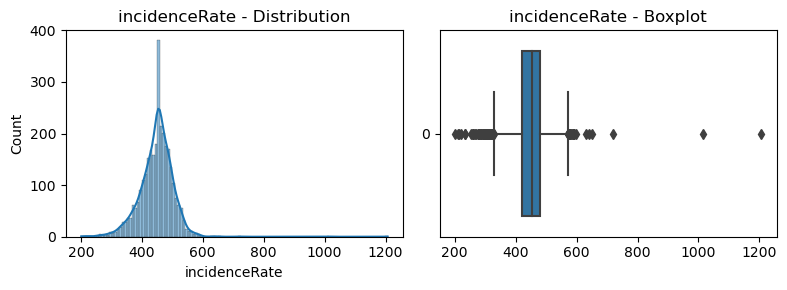

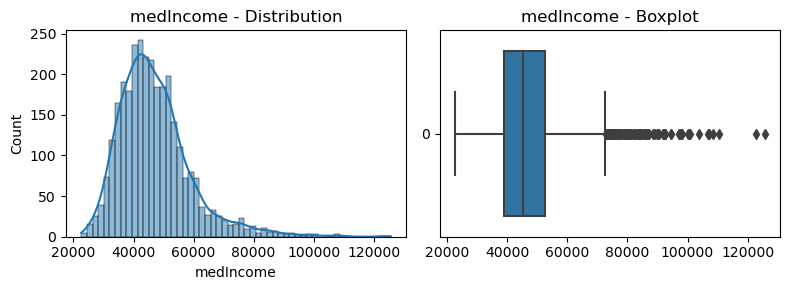

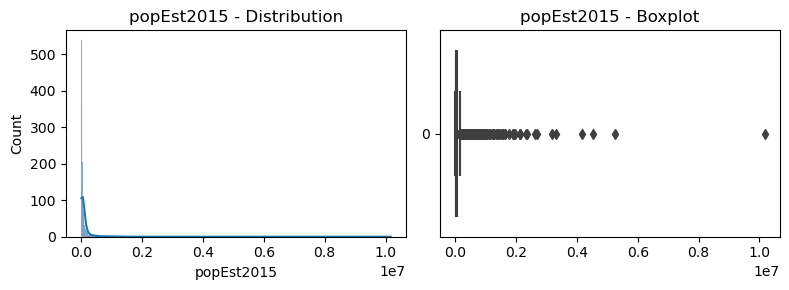

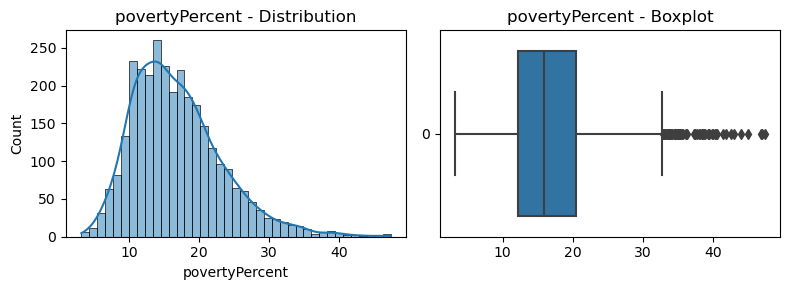

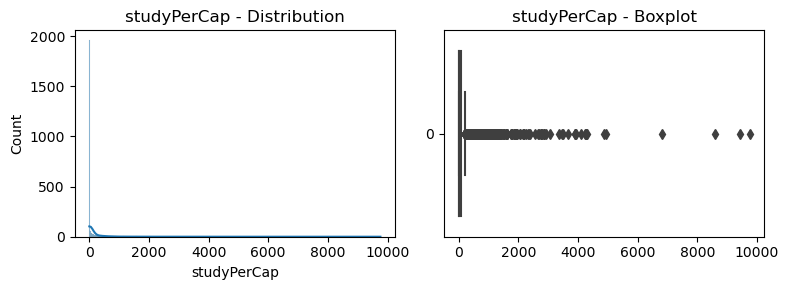

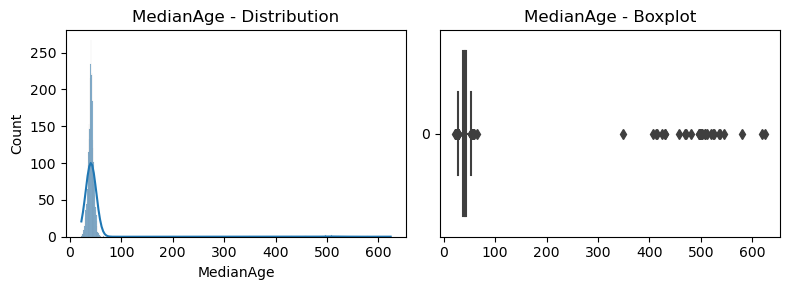

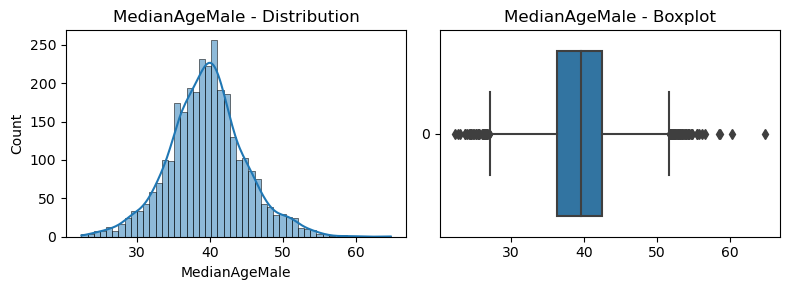

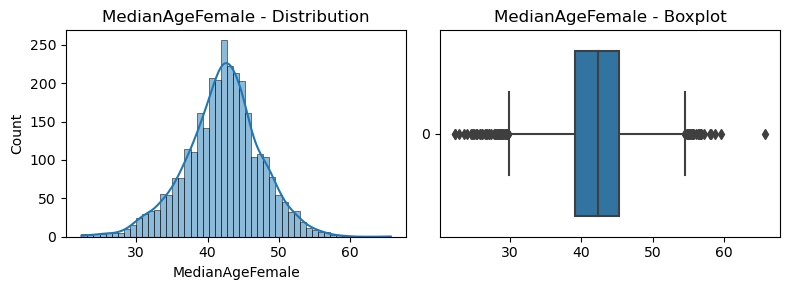

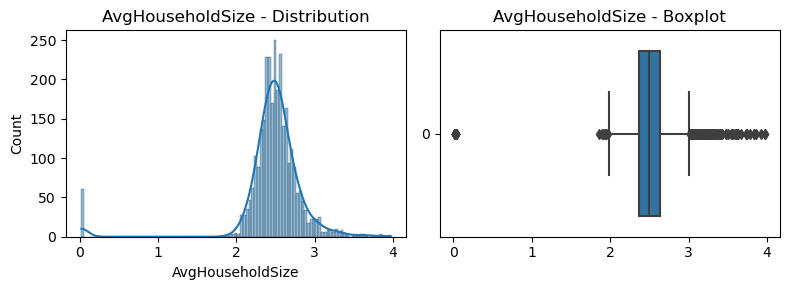

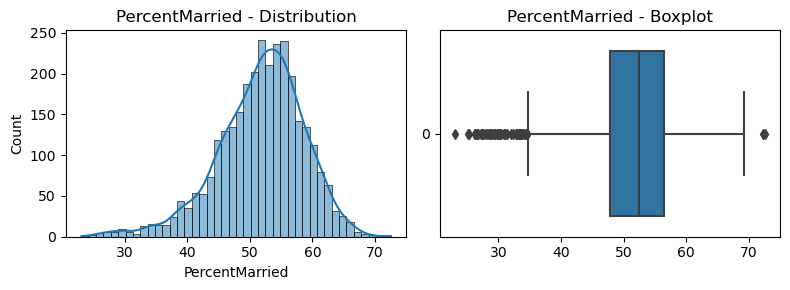

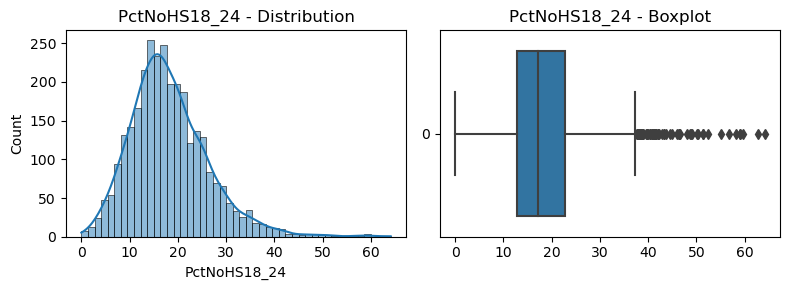

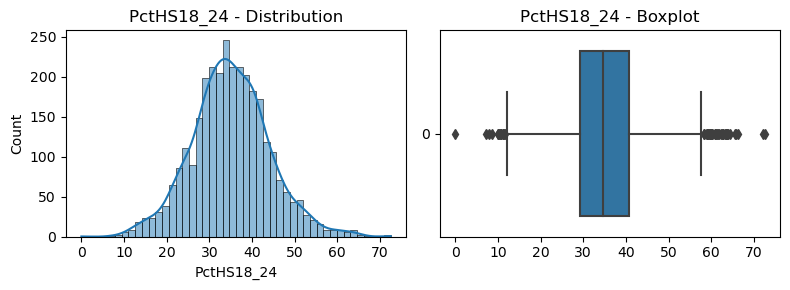

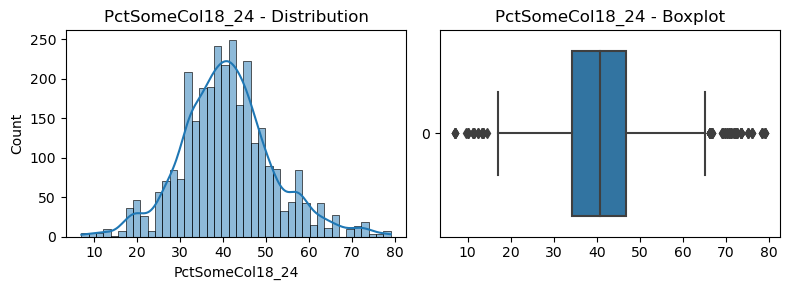

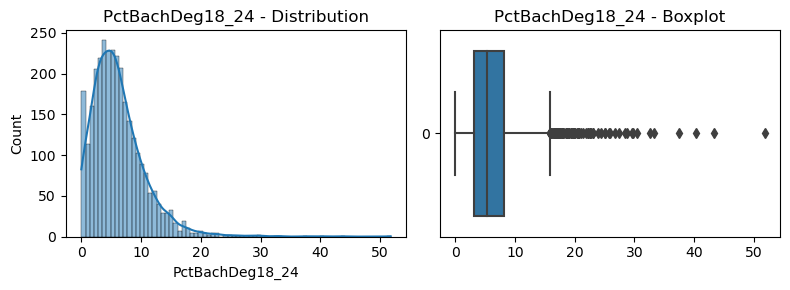

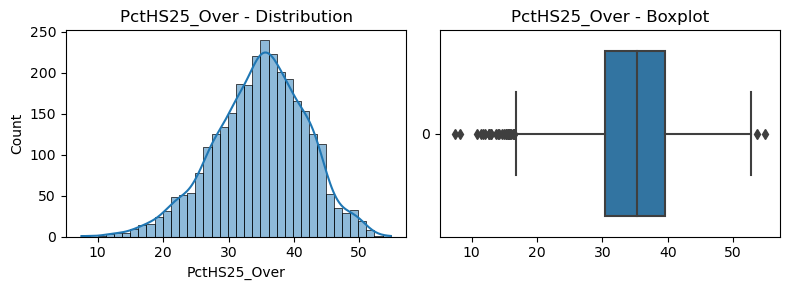

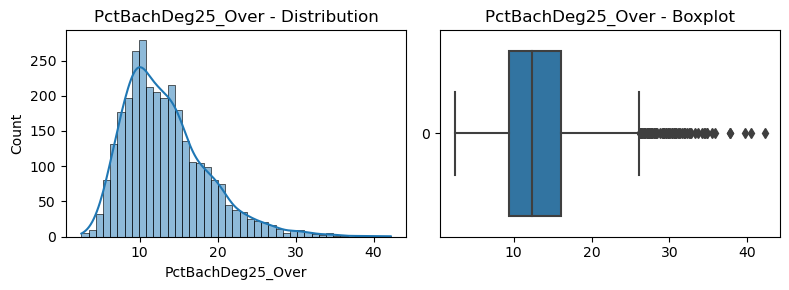

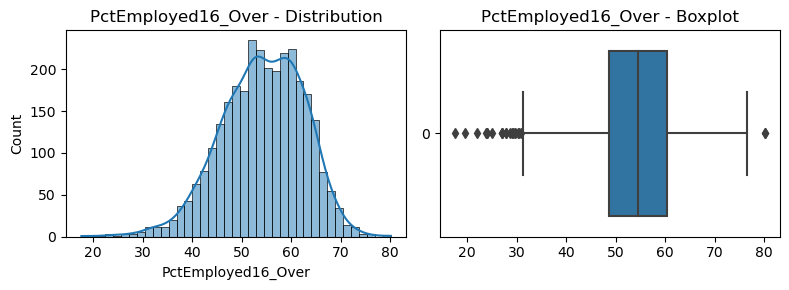

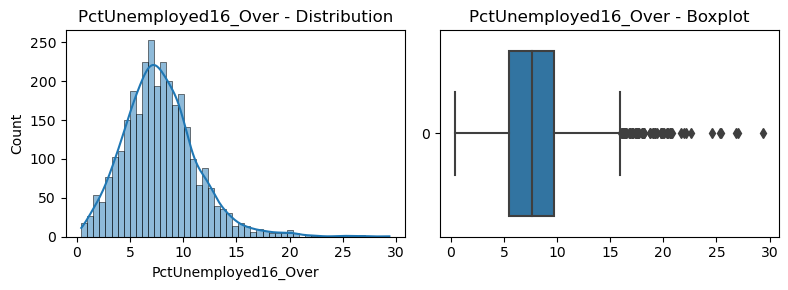

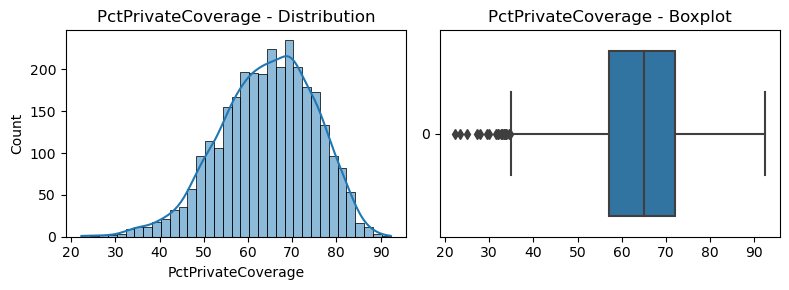

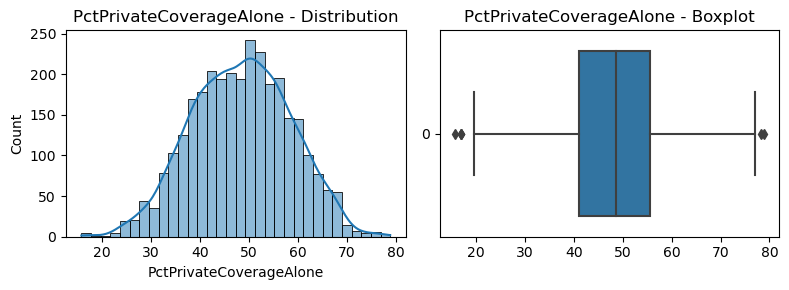

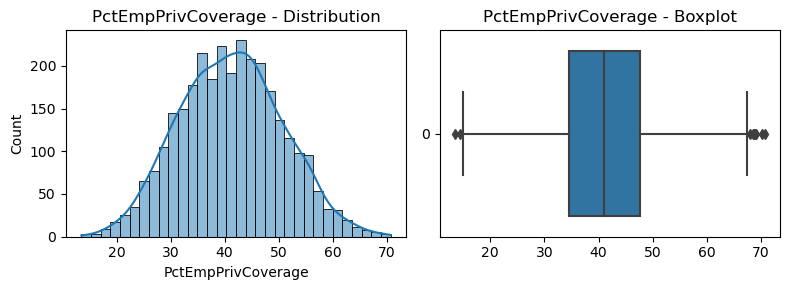

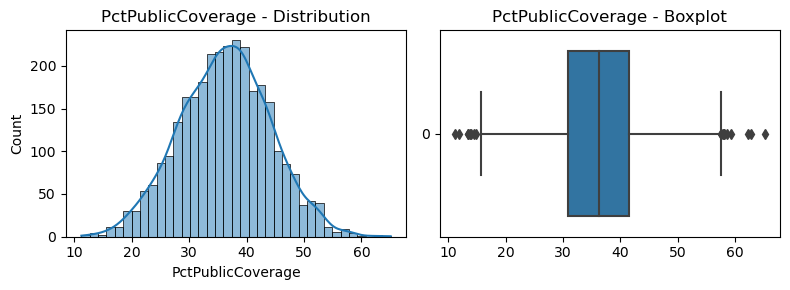

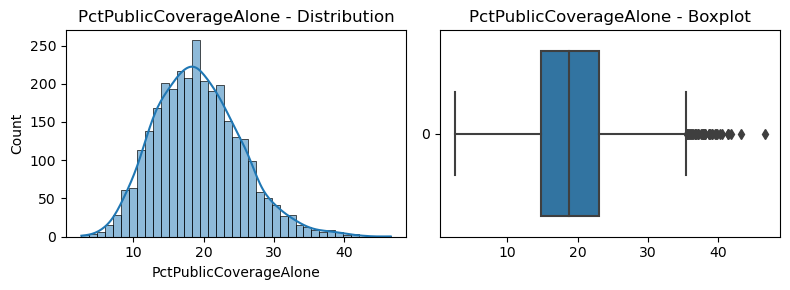

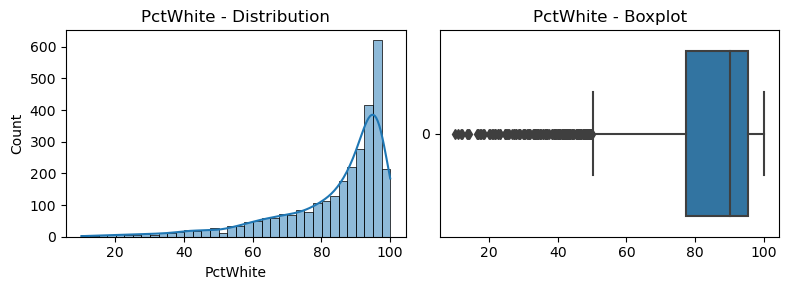

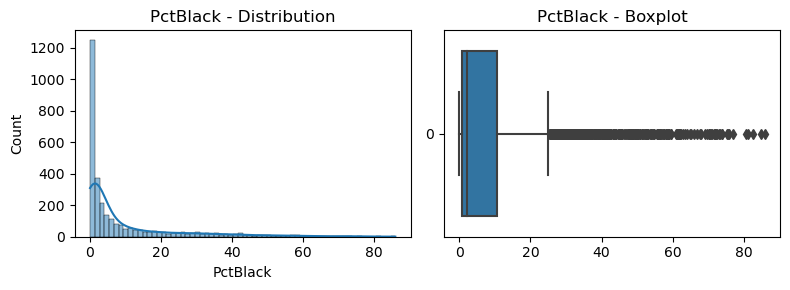

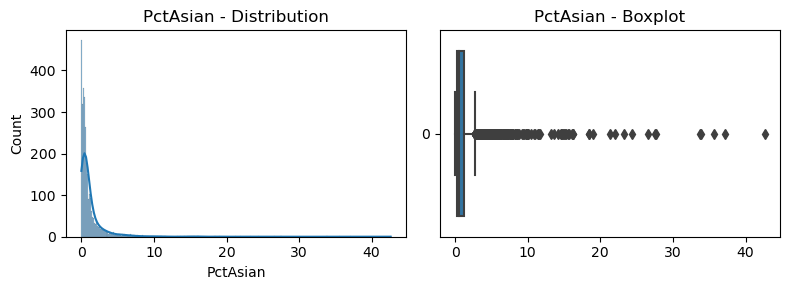

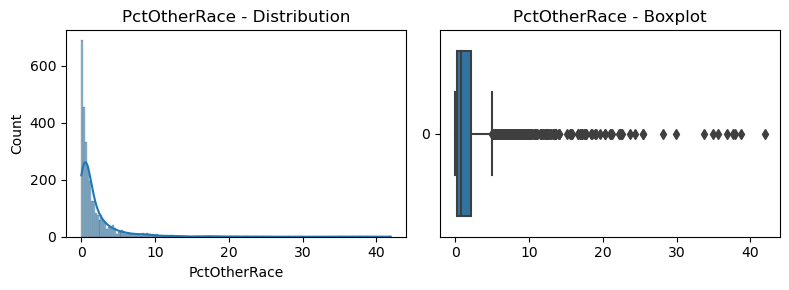

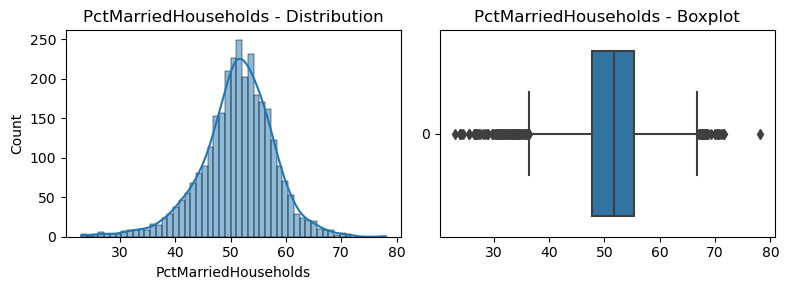

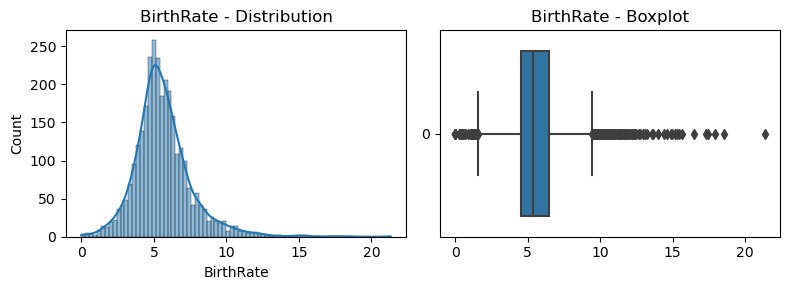

In [18]:
for column in DF.columns:
    if column == 'binnedInc' or column =='City' or column == 'Geography' or column == 'District':
        continue
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))  
    sns.histplot(data=DF[column], kde=True, ax=axes[0])
    sns.boxplot(data=DF[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

## Catching outliers 
we can do so using 2 ways 
* Interquartile range 
* Z-score 


  we will go with the z-score(normal distribution) and removing the data points that are not in the area that represents µ ± 3σ.  
  we will have to visualize the data using scatter plot and draw the distribution.  
  box plot will help in identifing the outliers. 

### Interquartile range 


In [19]:
for i in DF.columns:
    if i == 'binnedInc' or i =='City' or i == 'Geography' or i == 'District' or i == 'studyPerCap' or i == 'popEst2015' or i == 'PctPrivateCoverageAlone':
        continue
    Q1 = np.percentile(DF[f"{i}"], 25, method='midpoint')
    Q2 = np.percentile(DF[f"{i}"], 50, method='midpoint')
    Q3 = np.percentile(DF[f"{i}"], 75, method='midpoint')
    iqr = Q3-Q1  
    #iqr_with_scipy = stats.iqr(DF[f"{i}"],interpolation='midpoint') using scipy (from scipy import stats)
    DF[f"{i}"] = DF[f"{i}"][(DF[f"{i}"]<(Q3+1.5*iqr)) & (DF[f"{i}"]>(Q1-1.5*iqr))]

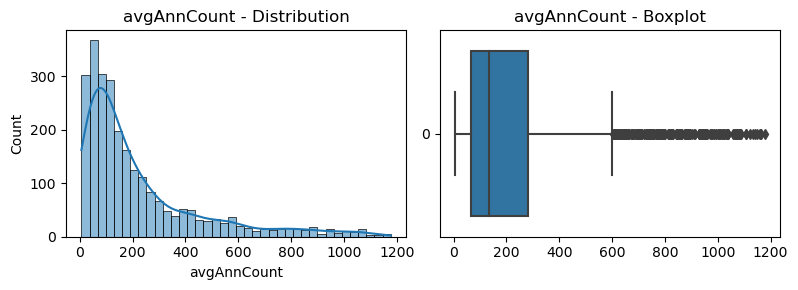

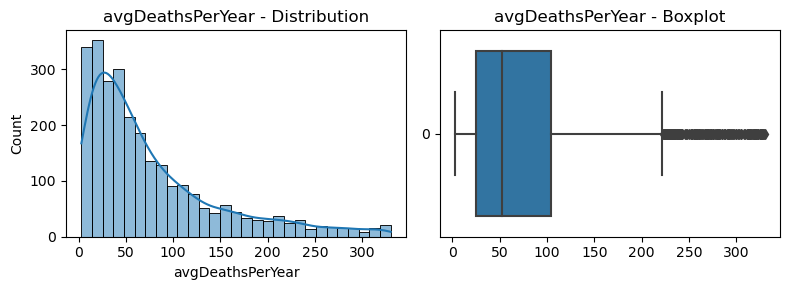

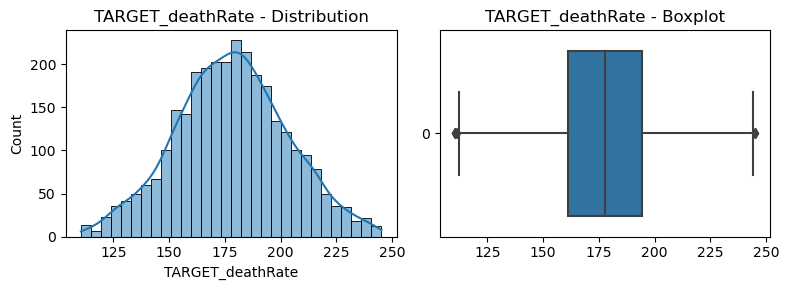

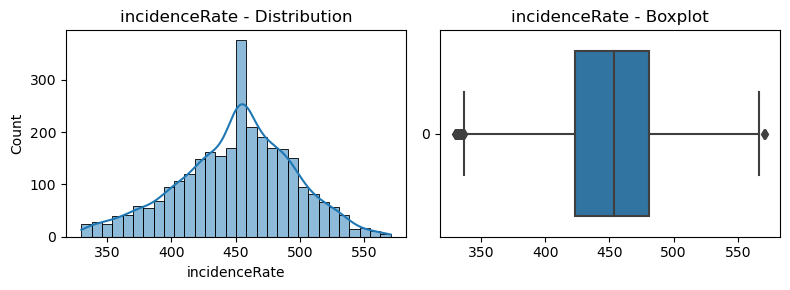

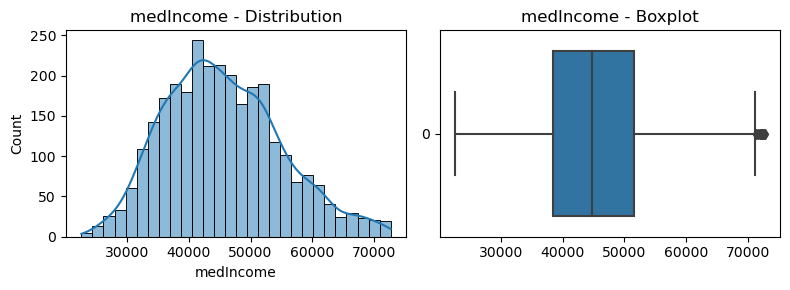

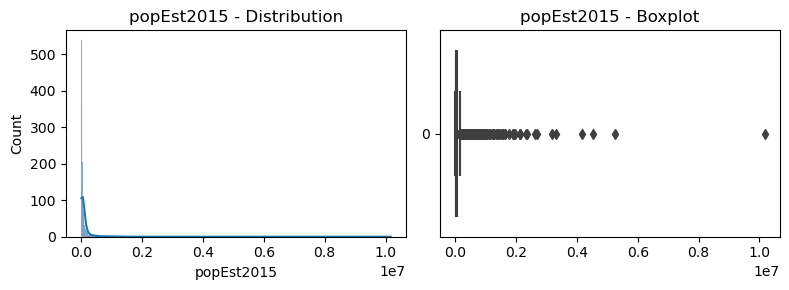

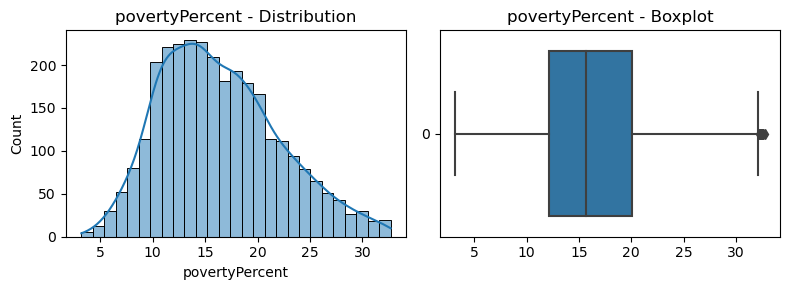

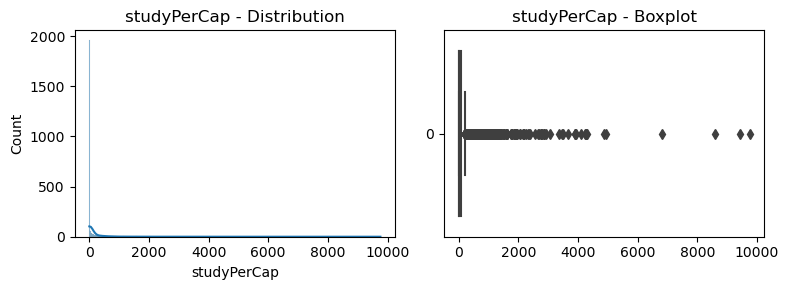

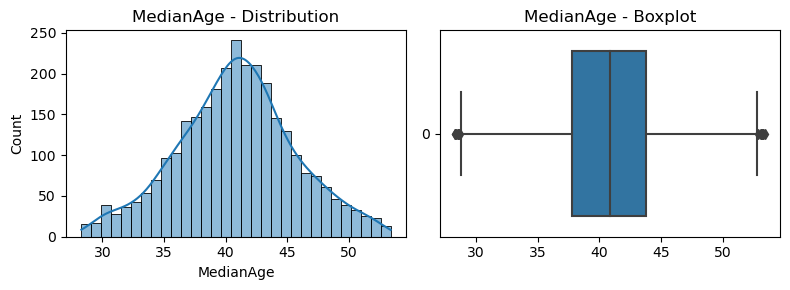

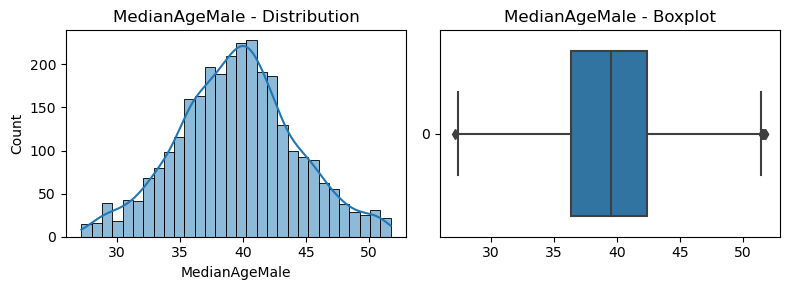

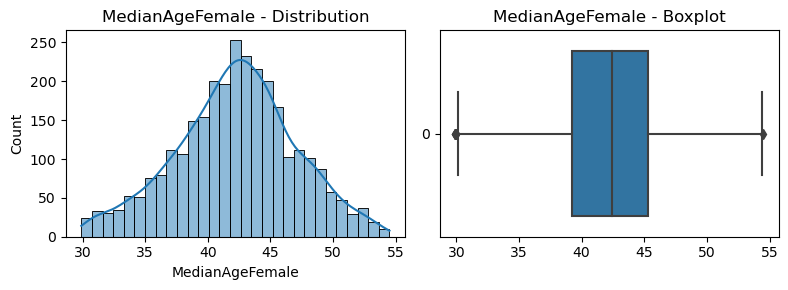

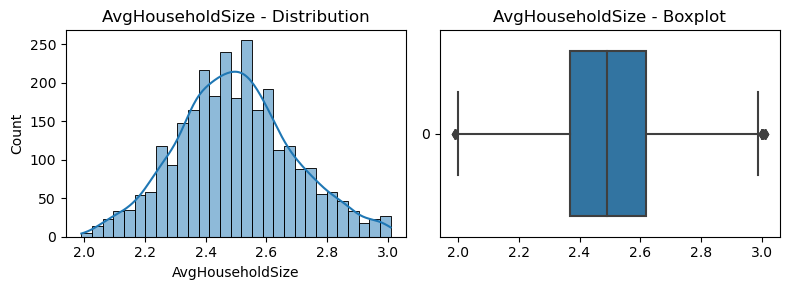

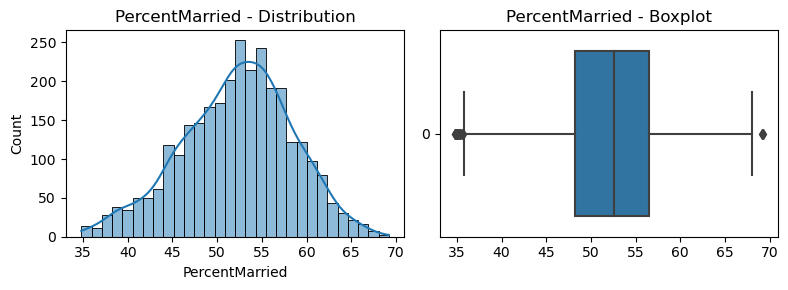

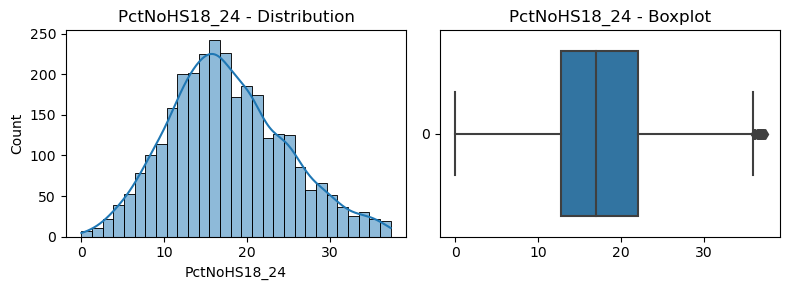

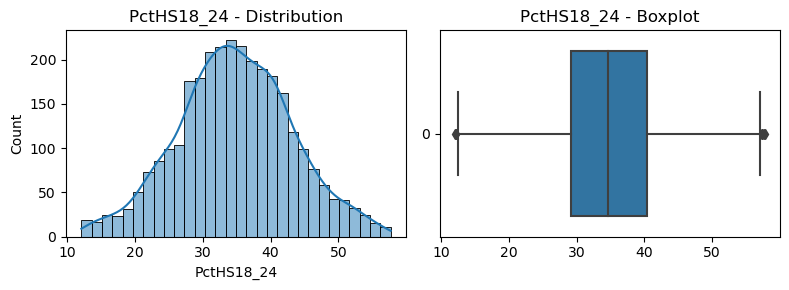

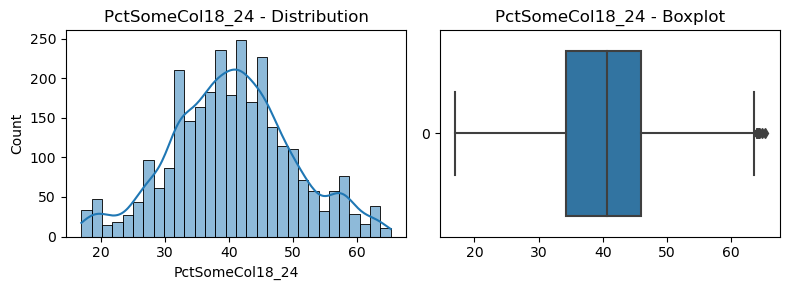

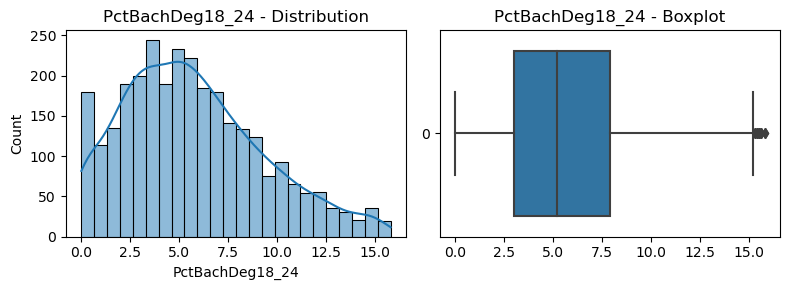

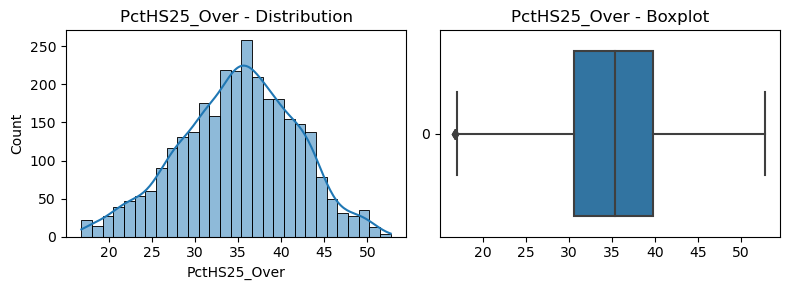

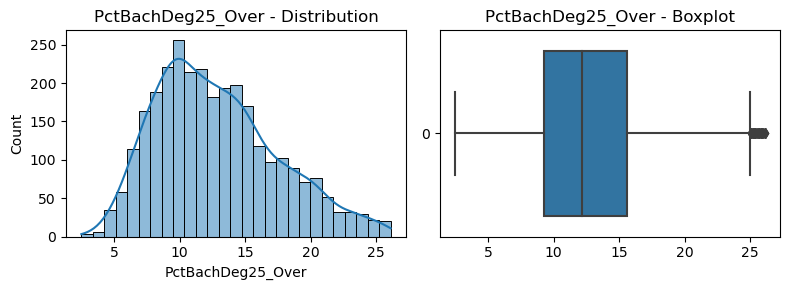

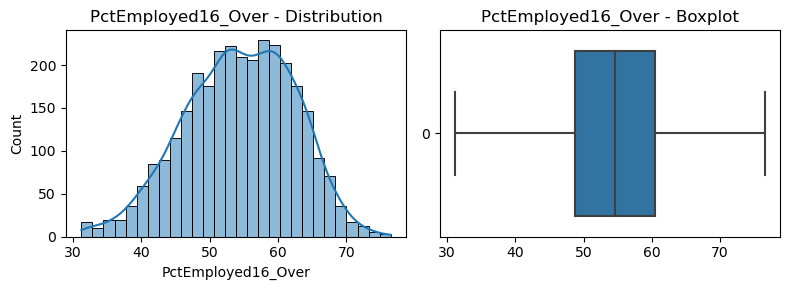

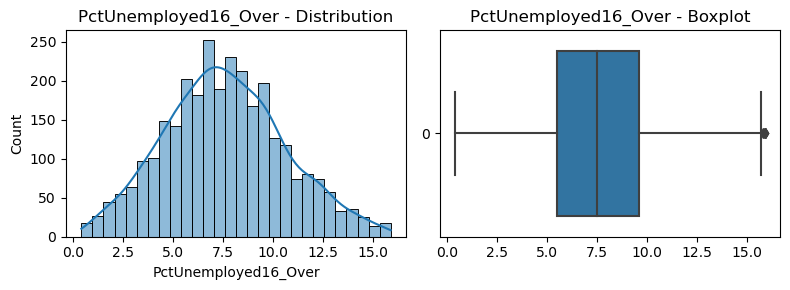

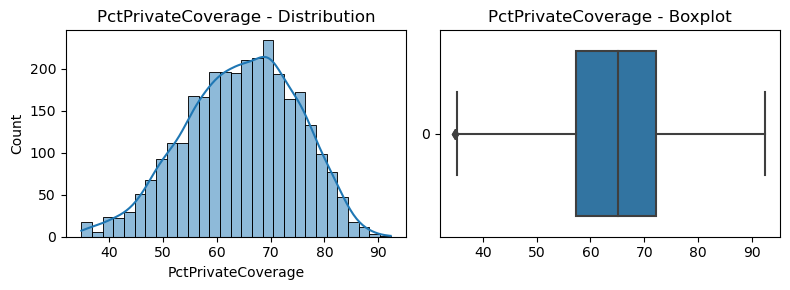

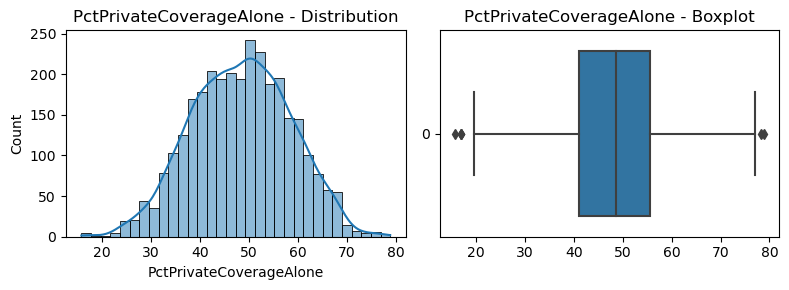

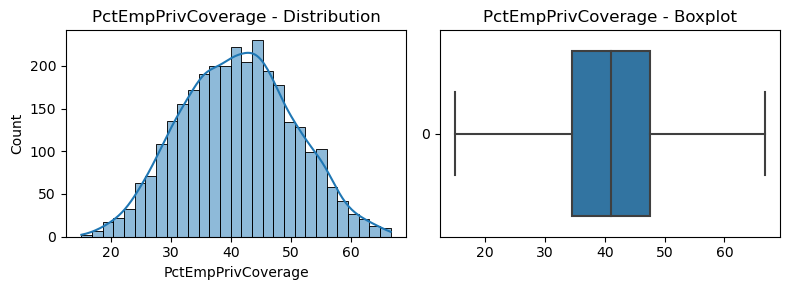

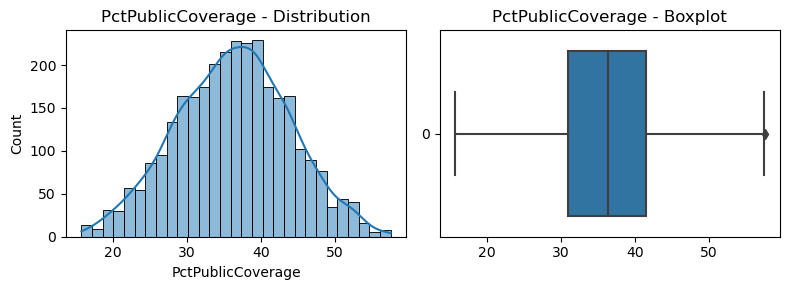

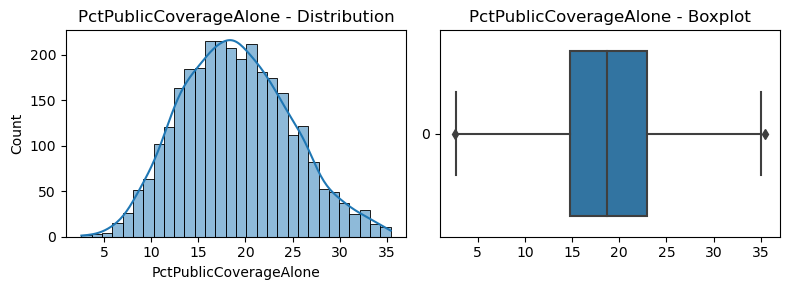

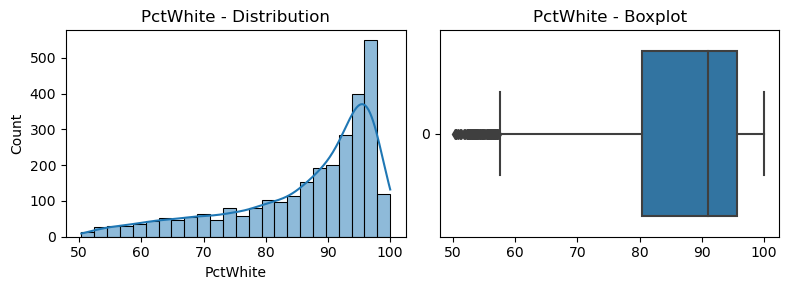

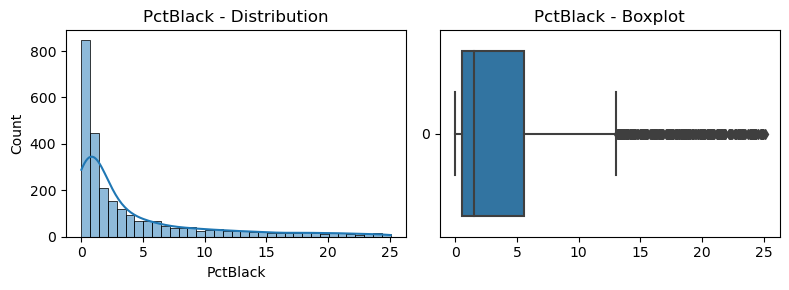

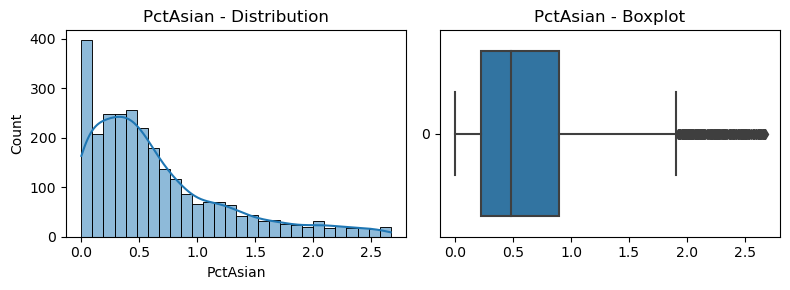

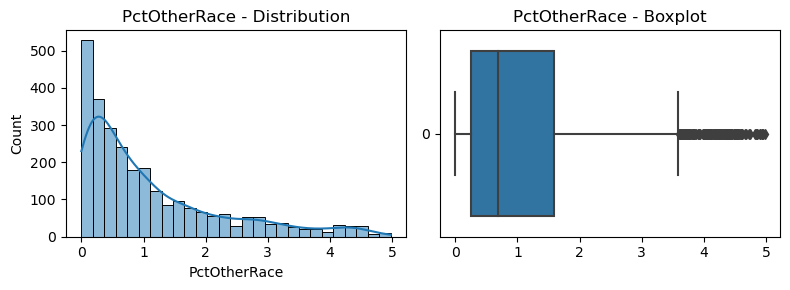

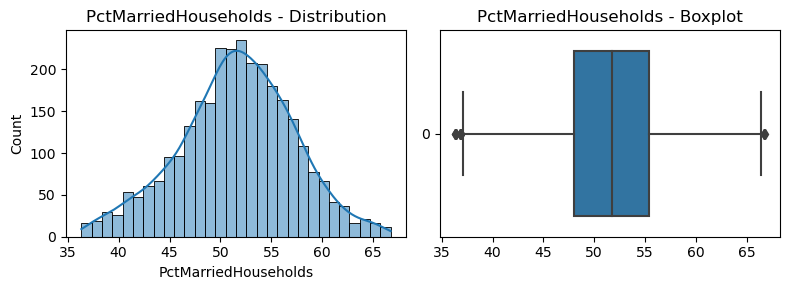

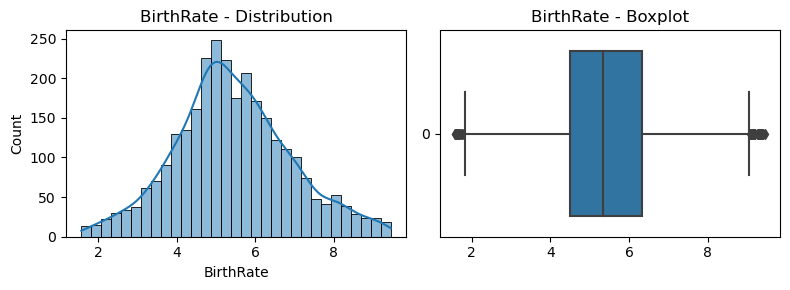

In [20]:
for column in DF.columns:
    if column == 'binnedInc' or column =='City' or column == 'Geography' or column == 'District':
        continue
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))  
    sns.histplot(data=DF[column], kde=True, ax=axes[0])
    sns.boxplot(data=DF[column], ax=axes[1], orient='h')
    axes[0].set_title(f'{column} - Distribution')
    axes[1].set_title(f'{column} - Boxplot')
    plt.tight_layout()
    plt.show()

In [22]:
table = DF.corr(method='pearson', numeric_only=True)
table['TARGET_deathRate']

avgAnnCount               -0.045015
avgDeathsPerYear           0.070902
TARGET_deathRate           1.000000
incidenceRate              0.393332
medIncome                 -0.400594
popEst2015                -0.127569
povertyPercent             0.400301
studyPerCap               -0.035002
MedianAge                  0.022105
MedianAgeMale              0.001067
MedianAgeFemale            0.034494
AvgHouseholdSize           0.068959
PercentMarried            -0.243139
PctNoHS18_24               0.116030
PctHS18_24                 0.260077
PctSomeCol18_24           -0.127161
PctBachDeg18_24           -0.225769
PctHS25_Over               0.389953
PctBachDeg25_Over         -0.435021
PctEmployed16_Over        -0.381089
PctUnemployed16_Over       0.367553
PctPrivateCoverage        -0.386774
PctPrivateCoverageAlone   -0.302710
PctEmpPrivCoverage        -0.254927
PctPublicCoverage          0.376922
PctPublicCoverageAlone     0.424369
PctWhite                  -0.094762
PctBlack                   0

<Axes: >

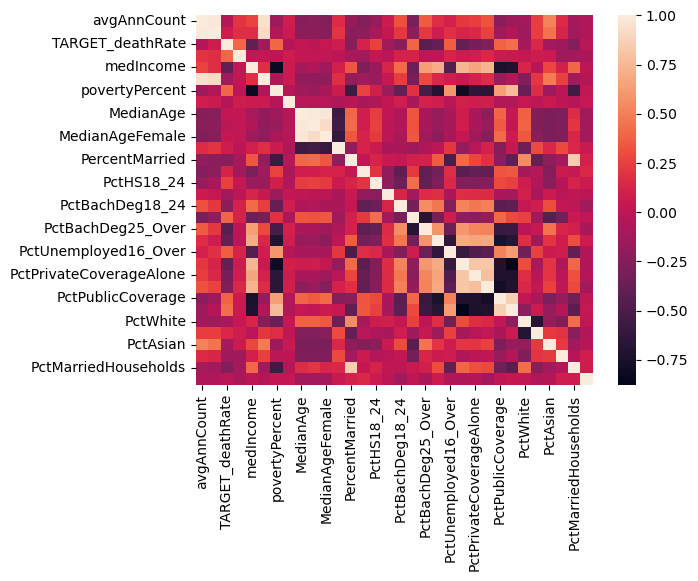

In [23]:
sns.heatmap(DF.corr(numeric_only=True))

<Axes: >

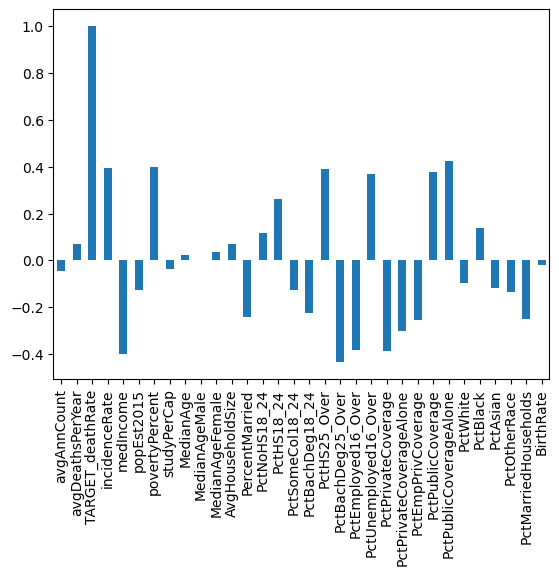

In [24]:
table['TARGET_deathRate'].plot(kind='bar')

In [27]:
# sns.pairplot(table)
# plt.show()

KeyboardInterrupt: 

In [ ]:
selected = ['incidenceRate', 'medIncome', 'povertyPercent', 'PercentMarried', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over', 
                                'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
                                'PctPublicCoverageAlone', 'PctMarriedHouseholds']

In [ ]:
target_table = table['TARGET_deathRate']
new_target_table = target_table[selected]
selected_DF = DF[selected]
print(new_target_table)

incidenceRate              0.393332
medIncome                 -0.400594
povertyPercent             0.400301
PercentMarried            -0.243139
PctHS18_24                 0.260077
PctBachDeg18_24           -0.225769
PctHS25_Over               0.389953
PctBachDeg25_Over         -0.435021
PctEmployed16_Over        -0.381089
PctUnemployed16_Over       0.367553
PctPrivateCoverage        -0.386774
PctPrivateCoverageAlone   -0.302710
PctEmpPrivCoverage        -0.254927
PctPublicCoverage          0.376922
PctPublicCoverageAlone     0.424369
PctMarriedHouseholds      -0.251383
Name: TARGET_deathRate, dtype: float64


In [ ]:
features_mean = DF[selected].mean()
print(features_mean)

incidenceRate                450.403379
medIncome                  45532.200684
povertyPercent                16.413600
PercentMarried                52.225848
PctHS18_24                    34.777796
PctBachDeg18_24                5.683644
PctHS25_Over                  34.992905
PctBachDeg25_Over             12.817470
PctEmployed16_Over            54.372165
PctUnemployed16_Over           7.596744
PctPrivateCoverage            64.586814
PctPrivateCoverageAlone       48.419698
PctEmpPrivCoverage            41.141093
PctPublicCoverage             36.235655
PctPublicCoverageAlone        19.010661
PctMarriedHouseholds          51.589955
dtype: float64


In [ ]:
features_median = DF[selected].median()
print(features_median)

incidenceRate                453.549422
medIncome                  44716.000000
povertyPercent                15.700000
PercentMarried                52.600000
PctHS18_24                    34.600000
PctBachDeg18_24                5.200000
PctHS25_Over                  35.300000
PctBachDeg25_Over             12.200000
PctEmployed16_Over            54.600000
PctUnemployed16_Over           7.500000
PctPrivateCoverage            65.200000
PctPrivateCoverageAlone       48.700000
PctEmpPrivCoverage            41.100000
PctPublicCoverage             36.300000
PctPublicCoverageAlone        18.700000
PctMarriedHouseholds          51.756341
dtype: float64


In [ ]:
features_mode = DF[selected].mode()
print(features_mode) # will have multiple rows because maybe there is more than one mode for each feature

   incidenceRate  medIncome  povertyPercent  PercentMarried  PctHS18_24  \
0     453.549422    34116.0            13.9            52.2        33.7   
1            NaN    36627.0             NaN             NaN         NaN   
2            NaN    42582.0             NaN             NaN         NaN   
3            NaN    48368.0             NaN             NaN         NaN   
4            NaN    51175.0             NaN             NaN         NaN   

   PctBachDeg18_24  PctHS25_Over  PctBachDeg25_Over  PctEmployed16_Over  \
0              0.0          35.6                9.0                51.9   
1              NaN           NaN                NaN                57.9   
2              NaN           NaN                NaN                 NaN   
3              NaN           NaN                NaN                 NaN   
4              NaN           NaN                NaN                 NaN   

   PctUnemployed16_Over  PctPrivateCoverage  PctPrivateCoverageAlone  \
0                   6.8   

In [ ]:
features_std = DF[selected].std()
print(features_std)

incidenceRate                44.922308
medIncome                  9378.964441
povertyPercent                5.672660
PercentMarried                6.177362
PctHS18_24                    8.430622
PctBachDeg18_24               3.552056
PctHS25_Over                  6.742084
PctBachDeg25_Over             4.641630
PctEmployed16_Over            8.004175
PctUnemployed16_Over          3.012282
PctPrivateCoverage           10.307859
PctPrivateCoverageAlone      10.041618
PctEmpPrivCoverage            9.328507
PctPublicCoverage             7.657359
PctPublicCoverageAlone        5.770066
PctMarriedHouseholds          5.626003
dtype: float64


In [ ]:
features_range = DF[selected].mean()
for column in selected:
    max = DF[column].max()
    min = DF[column].min()
    features_range[column] = "(" + str(min) + " - " + str(max) + ")"

print(features_range)

incidenceRate                          (329.9 - 570.8)
medIncome                          (22640.0 - 72648.0)
povertyPercent                            (3.2 - 32.7)
PercentMarried                           (34.8 - 69.2)
PctHS18_24                               (12.1 - 57.7)
PctBachDeg18_24                           (0.0 - 15.8)
PctHS25_Over                             (16.8 - 52.7)
PctBachDeg25_Over                         (2.5 - 26.1)
PctEmployed16_Over                       (31.2 - 76.5)
PctUnemployed16_Over                      (0.4 - 15.9)
PctPrivateCoverage                       (34.9 - 92.3)
PctPrivateCoverageAlone                  (15.7 - 78.9)
PctEmpPrivCoverage                       (15.0 - 66.7)
PctPublicCoverage                        (15.7 - 57.5)
PctPublicCoverageAlone                    (2.6 - 35.4)
PctMarriedHouseholds       (36.33759365 - 66.72032402)
dtype: object


# Standardization

In [ ]:
for feature in selected:
    selected_DF[feature] = selected_DF[feature] - features_mean[feature]
    selected_DF[feature] = selected_DF[feature] / features_std[feature]

selected_DF.head()

C:\Users\mohamed ibrahim\AppData\Local\Temp\ipykernel_15264\2760964739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_DF[feature] = selected_DF[feature] - features_mean[feature]
C:\Users\mohamed ibrahim\AppData\Local\Temp\ipykernel_15264\2760964739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_DF[feature] = selected_DF[feature] / features_std[feature]


,incidenceRate,medIncome,povertyPercent,PercentMarried,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctMarriedHouseholds
0,0.876995,1.744947,-0.919075,0.044380,0.560125,0.342437,-1.749148,1.461239,-0.308859,0.133871,1.019919,NaN,0.049194,-0.435614,-0.868389,0.225048
1,-0.863789,0.276662,0.385428,-1.250671,-1.468195,0.511354,-1.333846,2.129108,0.190880,0.067476,0.544554,0.535800,0.263591,-0.670682,-0.643088,-1.105128
2,-2.241723,0.406847,-0.319709,0.319579,0.216141,1.074408,-0.888880,0.685649,-1.058468,-0.198104,-0.086033,-0.489931,-0.669034,0.765844,0.362100,0.507450
3,-0.445288,-0.137457,0.121001,0.076756,0.761771,-0.896282,-0.503243,-0.757809,-0.758625,1.494965,-0.600204,-0.808605,-0.658315,1.183743,1.038002,-0.101038
4,-2.232819,0.471566,-0.689906,0.902352,0.975278,-1.037046,-0.236263,0.470208,-0.771118,-0.928447,-0.289761,-0.450097,-0.647595,1.013972,0.639393,0.433257


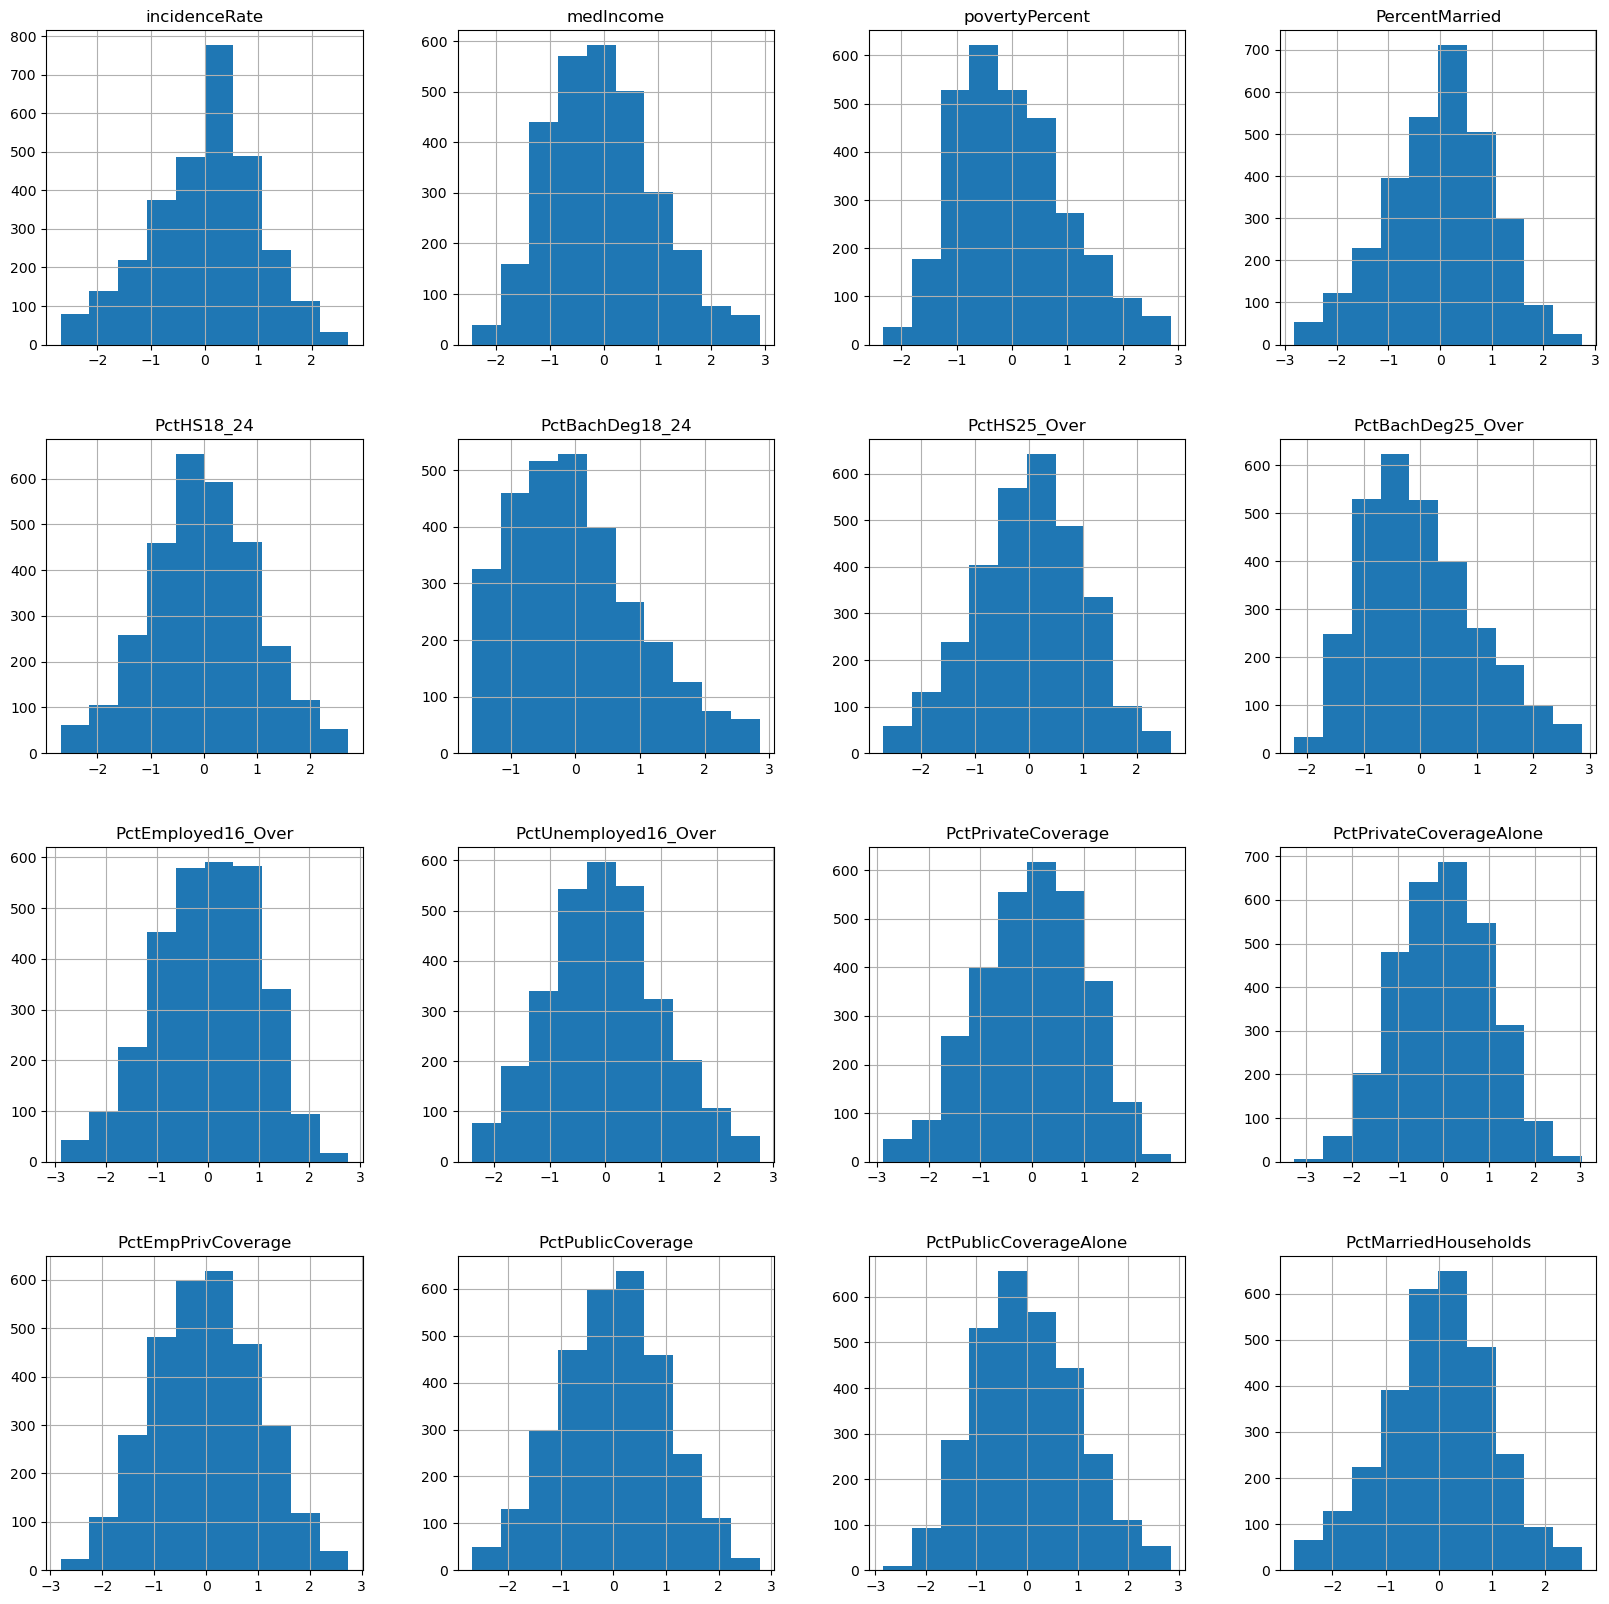

In [ ]:
selected_DF.hist(figsize=(20, 20))
plt.show()